In [4]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

import plotly
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import init_notebook_mode, iplot

import imblearn


import seaborn as sns

init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 100)

In [9]:
data = pd.read_csv("DATA.csv")

In [10]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,25,19,6,9,21,13,-37,-58,-33,...,-23,8,42,77,103,135,121,79,59,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,309,309,303,297,295,295,293,286,279,...,-1360,-662,-96,243,323,241,29,-167,-228,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,...,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,-67,-66,-58,-54,-56,-70,-80,-82,-85,...,-61,-66,-72,-88,-90,-88,-77,-58,-53,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,16,14,-14,-42,-56,-45,-45,-45,-38,...,55,54,38,19,4,-1,10,22,26,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [11]:
data.tail()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,-63,-63,-60,-57,-52,-46,-33,-27,-33,-32,...,-9,-15,-19,-20,-18,-14,0,9,21,34,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,-29,-52,-67,-96,-123,-143,-155,-167,-176,-185,...,52,57,61,60,54,53,55,62,65,68,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,88,90,76,18,5,10,23,48,32,4,...,-43,-48,-44,-22,-17,18,50,45,-9,-78,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,-56,-77,-105,-110,-103,-89,-80,-81,-98,-113,...,-98,-103,-99,-81,-56,-61,-67,-111,-112,-120,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,3
11499,X16.V1.210,29,41,57,72,74,62,54,43,31,23,13,11,-3,-5,-9,-14,1,27,60,69,69,50,33,20,15,4,-5,-4,-8,-15,-13,-2,21,39,48,37,10,-23,-47,-71,-80,-74,-59,-44,-30,-17,-3,6,13,...,49,65,64,44,15,-14,-38,-68,-99,-107,-108,-83,-46,0,30,39,44,33,22,8,-13,-33,-61,-70,-75,-74,-58,-18,19,54,71,76,74,65,56,18,-28,-75,-98,-94,-59,-25,-4,2,5,4,-2,2,20,4


In [13]:
data.shape

(11500, 180)

This dataset is a pre processed form of Electroencephalogram (EEG) signals specifically collected for the sake of predicting Epileptic seizures. This dataset contains 11500 samples and 180 features, each feature representing the EEG signal data.

ROWS: 11500
COLUMNS: 180

The last column contains the category of the 178-dimensional input vector. y can take values: {1, 2, 3, 4, 5}

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open
4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed
3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area
2 - They recorder the EEG from the area where the tumor was located
1 - Recording of seizure activity All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure.

In [14]:
data['y'].value_counts()

4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64

<AxesSubplot: >

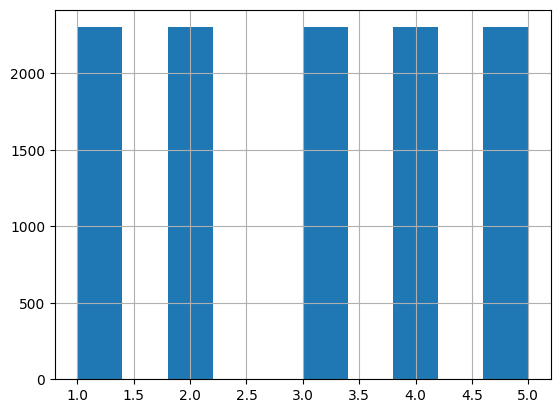

In [15]:
data.y.hist()

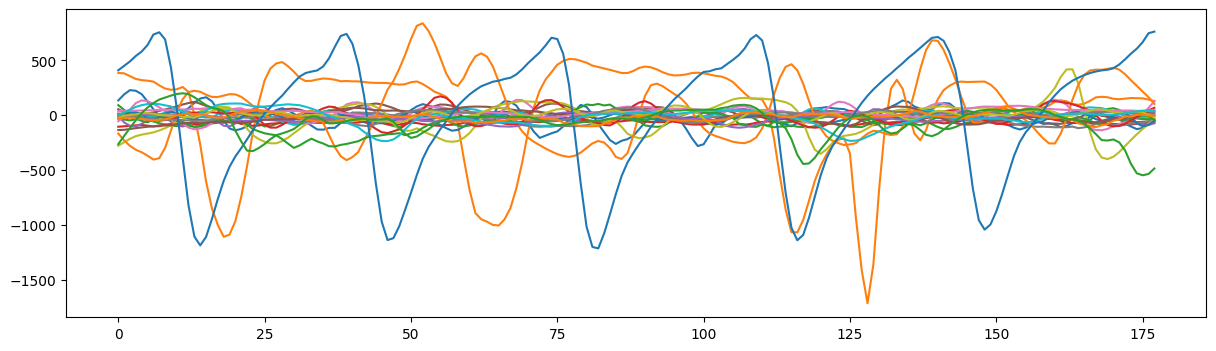

In [16]:
plt.figure(figsize=(50,4))
plt.subplot(131)
[plt.plot(data.values[i][1:-1]) for i in range(23)];

As we can see, samples with y label {1} have seizures whereas all other {2,3,4,5} do not have seizures. So this multi-classification task can be converted to a binary classification task. The first part will cover binary classification. Later we'll train the models for multi-classification.

In [17]:
dic = {5: 0, 4: 0, 3: 0, 2: 0, 1: 1}
data['y'] = data['y'].map(dic)
#Converting this to binary

In [18]:
print(data['y'].value_counts())

data.head()

0    9200
1    2300
Name: y, dtype: int64


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,25,19,6,9,21,13,-37,-58,-33,...,-23,8,42,77,103,135,121,79,59,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,309,309,303,297,295,295,293,286,279,...,-1360,-662,-96,243,323,241,29,-167,-228,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,...,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,-67,-66,-58,-54,-56,-70,-80,-82,-85,...,-61,-66,-72,-88,-90,-88,-77,-58,-53,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,16,14,-14,-42,-56,-45,-45,-45,-38,...,55,54,38,19,4,-1,10,22,26,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [19]:
data = data.drop('Unnamed', axis = 1)

In [20]:
data = shuffle(data)

In [23]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,-6.964087,-5.773826,-4.700783,-4.143826,-4.546087,-5.53200,-6.670435,-7.702348,-7.894696,-8.081391,...,-7.629391,-7.373565,-7.439913,-7.592348,-6.897652,-6.000348,-5.423913,-5.151043,-5.586870,-6.281478,-6.997304,-7.339391,-7.911565,-8.177304,-8.608870,-8.578087,-8.240000,-7.691391,-7.356522,-7.228783,-6.980870,-6.756783,-6.355304,-6.423826,-6.465217,-6.316435,-5.808000,-5.255913,-4.682087,-4.638609,-4.770261,-5.650870,-7.170348,-8.759826,-9.784783,-10.096261,-9.842957,-9.701739,-9.351391,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,160.471017,161.181118,165.071121,169.198359,170.641967,168.930355,164.646296,162.062661,162.571333,162.339911,162.823325,163.909723,165.844176,166.009100,164.715153,162.77423,162.902294,164.799831,165.391697,164.291120,163.165167,163.408052,163.561408,162.548119,160.813772,160.441049,162.881958,166.235164,166.314965,164.513017,161.197812,158.045513,157.490904,160.163082,163.996955,167.74431,171.232021,171.484787,169.299229,166.255922,...,158.301750,157.214361,158.679911,160.183325,162.002986,164.260512,166.182755,167.154785,167.414376,168.020316,168.567495,168.662705,167.643458,167.414439,167.922773,168.274009,167.808218,166.739558,165.678558,167.130911,168.156296,167.459868,165.061414,164.248830,166.226332,168.143625,167.067064,166.446540,167.554020,169.418457,170.639171,170.817824,168.145372,166.817974,166.999981,167.756860,166.988820,167.062497,166.606345,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11500 entries, 9180 to 11295
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.8 MB


In [25]:
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(data[data['y'] == 0]), len(data[data['y'] == 1])))

Number of records of Non Epileptic 9200 VS Epilepttic 2300


In [26]:
#Description of Non Epileptic
data[data['y'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,9200.0,-8.992609,70.455286,-566.0,-44.0,-7.0,26.0,1726.0
X2,9200.0,-8.877174,70.560110,-609.0,-44.0,-7.0,27.0,1713.0
X3,9200.0,-8.910435,70.372582,-594.0,-45.0,-7.0,28.0,1697.0
X4,9200.0,-8.969783,70.030409,-549.0,-45.0,-8.0,27.0,1612.0
X5,9200.0,-9.085326,69.377958,-603.0,-45.0,-8.0,27.0,1437.0
...,...,...,...,...,...,...,...,...
X175,9200.0,-9.848587,69.550894,-570.0,-45.0,-9.0,27.0,1958.0
X176,9200.0,-9.620435,70.353607,-594.0,-46.0,-8.0,27.0,2047.0
X177,9200.0,-9.395435,70.934300,-563.0,-45.0,-9.0,27.0,2047.0
X178,9200.0,-9.240435,71.185850,-559.0,-45.0,-8.0,27.0,1915.0


In [27]:
#Description of Epileptic

data[data['y'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,2300.0,-21.936522,342.361939,-1839.0,-193.25,-16.0,159.00,1314.0
X2,2300.0,-19.049130,343.398782,-1838.0,-191.25,-18.0,168.25,1356.0
X3,2300.0,-15.293913,337.489643,-1835.0,-187.00,-12.5,169.25,1274.0
X4,2300.0,-9.836087,332.354833,-1845.0,-184.00,-6.0,166.25,1226.0
X5,2300.0,-3.707391,332.211163,-1791.0,-174.25,-12.0,170.00,1518.0
...,...,...,...,...,...,...,...,...
X175,2300.0,-25.830870,339.650467,-1863.0,-195.00,-14.5,153.25,1205.0
X176,2300.0,-25.043913,335.747017,-1781.0,-192.00,-18.0,150.00,1371.0
X177,2300.0,-24.548261,335.244512,-1727.0,-190.25,-21.5,151.25,1445.0
X178,2300.0,-24.016522,339.819309,-1829.0,-189.00,-23.0,157.25,1380.0


In [28]:
print('Mean VALUE for Epiletic: {}'.format((data[data['y'] == 1].describe().mean()).mean()))

print('Std VALUE for Epiletic: {}'.format((data[data['y'] == 1].describe().std()).std()))

print('Totall Mean VALUE for NON Epiletic: {}'.format((data[data['y'] == 0].describe().mean()).mean()))

print('Totall Std VALUE for NON Epiletic: {}'.format((data[data['y'] == 0].describe().std()).std()))

Mean VALUE for Epiletic: 290.129360958884
Std VALUE for Epiletic: 53.56315864740058
Totall Mean VALUE for NON Epiletic: 1260.098927262616
Totall Std VALUE for NON Epiletic: 15.561044289100993


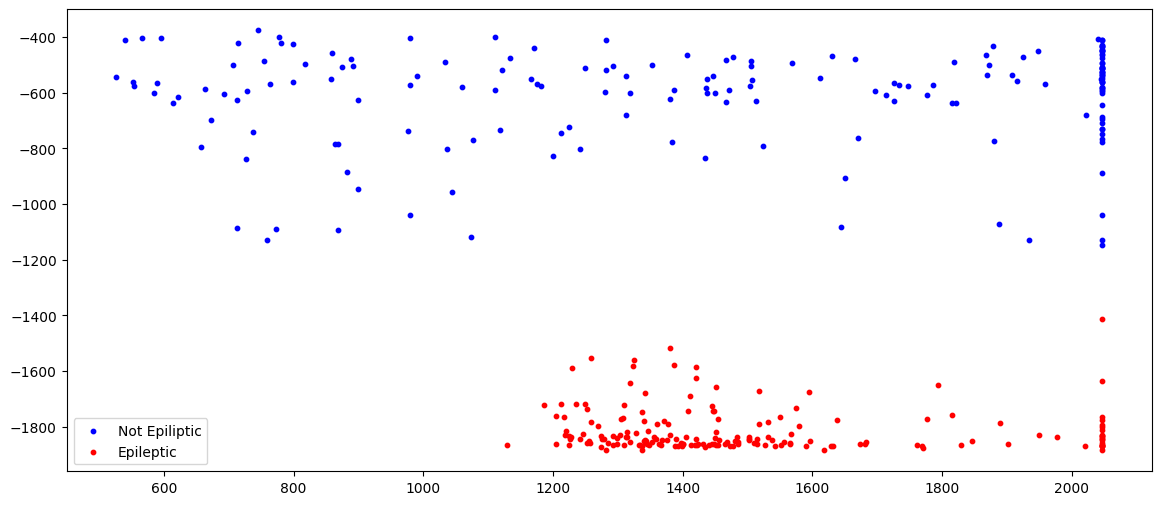

In [29]:
#lists of arrays containing all data without y column
not_epileptic = [data[data['y']==0].iloc[:, range(0, len(data.columns)-1)].values]
epileptic = [data[data['y']==1].iloc[:, range(0, len(data.columns)-1)].values]

#We will create and calculate 2d indicators in order plot data in 2 dimensions;

def indic(data):
    """Indicators can be different. In our case we use just min and max values
    Additionally, it can be mean and std or another combination of indicators"""
    max = np.max(data, axis=1)
    min = np.min(data, axis=1)
    return max, min

x1,y1 = indic(not_epileptic)
x2,y2 = indic(epileptic)

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=10, c='b', label='Not Epiliptic')
ax1.scatter(x2, y2, s=10, c='r', label='Epileptic')
plt.legend(loc='lower left');
plt.show()

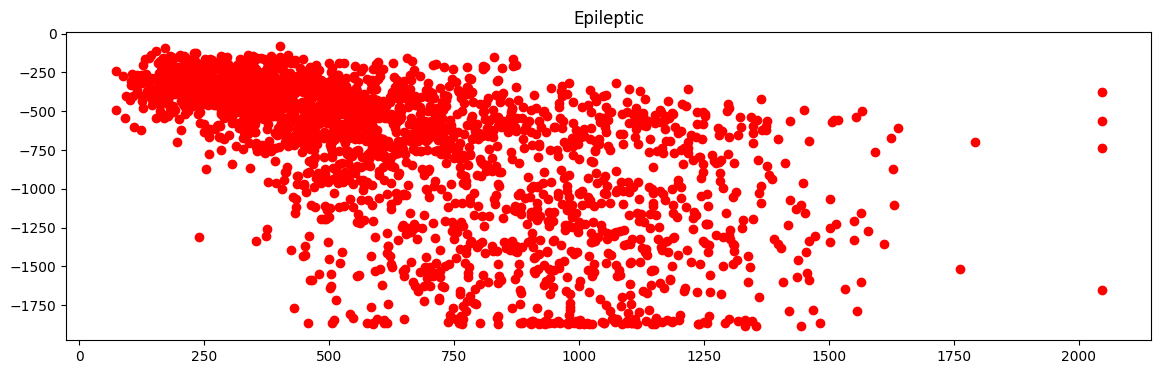

In [33]:
#Epileptic
x,y = indic(data[data['y']==1].iloc[:, range(0, len(data.columns)-1)].values)
plt.figure(figsize=(14,4))
plt.title('Epileptic')
plt.scatter(x, y, c='r');

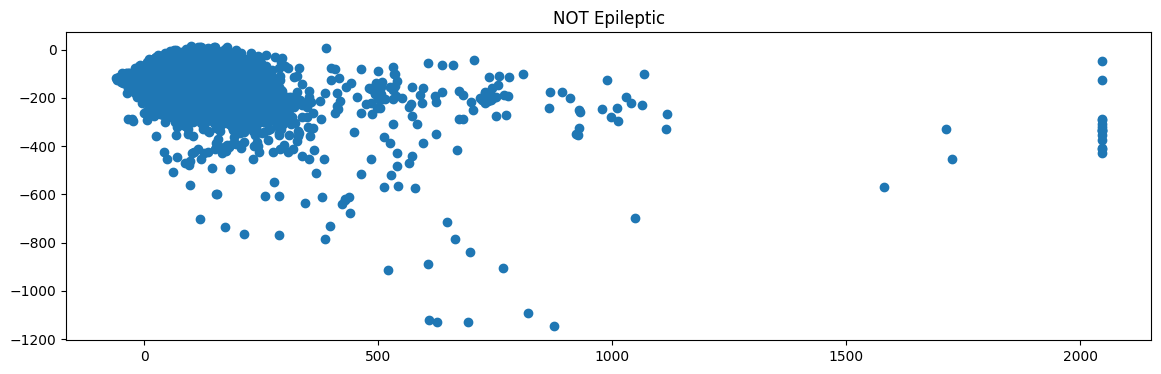

In [32]:
#Not Epileptic
x,y = indic(data[data['y']==0].iloc[:, range(0, len(data.columns)-1)].values)
plt.figure(figsize=(14,4))
plt.title('NOT Epileptic')
plt.scatter(x, y);

In [34]:
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(data[data['y'] == 0]), len(data[data['y'] == 1])))

Number of records of Non Epileptic 9200 VS Epilepttic 2300


### Eliminating Imbalance

As we can see, this dataset is quite imbalanced, so we'll need to perform balancing techniques. This can be done using the imblearn library in Python that can create synthetic samples in order to balance out the data and thus provide us with more accurate results.

In [35]:
# define oversampling strategy
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(data.drop('y', axis=1), data['y'])

X.shape, y.shape

((18400, 178), (18400,))

In [36]:
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(y == True), len(y == False)))

Number of records of Non Epileptic 18400 VS Epilepttic 18400


Now the data is balanced as number of records for epileptic as well as non epileptic are equal (18400) Before it was 2300 by 9200

### Normalizing

In [37]:
# X = data.drop('y', axis=1)
# y = data['y']

normalized_df = pd.DataFrame(normalize(X))
normalized_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177
0,-0.016876,-0.026082,-0.026082,-0.030685,-0.018411,-0.039890,-0.038356,-0.050629,-0.052164,-0.061369,-0.062903,-0.065972,-0.067506,-0.064437,-0.056766,-0.044493,-0.036821,-0.023013,-0.018411,-0.027616,-0.024548,-0.033753,-0.036821,-0.035287,-0.027616,-0.029150,-0.023013,-0.013808,-0.010740,-0.016876,-0.026082,-0.029150,-0.036821,-0.046027,-0.035287,-0.041424,-0.044493,-0.049095,-0.039890,-0.035287,-0.027616,-0.026082,-0.019945,-0.027616,-0.033753,-0.036821,-0.033753,-0.042958,-0.032219,-0.033753,...,-0.036821,-0.035287,-0.042958,-0.053698,-0.062903,-0.075177,-0.092054,-0.085917,-0.078246,-0.073643,-0.055232,-0.044493,-0.039890,-0.046027,-0.035287,-0.039890,-0.055232,-0.062903,-0.072109,-0.087451,-0.095122,-0.099725,-0.107396,-0.115067,-0.122738,-0.124272,-0.135012,-0.141149,-0.144217,-0.153423,-0.153423,-0.158025,-0.153423,-0.150354,-0.141149,-0.119670,-0.108930,-0.081314,-0.061369,-0.033753,-0.015342,-0.001534,0.012274,0.016876,0.018411,0.010740,0.006137,-0.012274,-0.021479,-0.032219
1,-0.043528,-0.055965,-0.049746,-0.049746,-0.035237,-0.024873,0.000000,0.020728,0.049746,0.070474,0.087056,0.097420,0.105711,0.103638,0.087056,0.084983,0.076692,0.076692,0.062183,0.041455,0.026946,0.004146,0.004146,0.012437,0.010364,0.022800,0.033164,0.041455,0.035237,0.043528,0.060110,0.080838,0.105711,0.134730,0.159603,0.169967,0.167894,0.165821,0.149239,0.134730,0.111929,0.074620,0.047674,0.024873,0.006218,-0.002073,-0.008291,0.000000,0.006218,0.002073,...,-0.008291,0.000000,0.004146,0.000000,-0.008291,-0.024873,-0.031092,-0.047674,-0.045601,-0.037310,-0.029019,-0.018655,0.004146,0.045601,0.080838,0.114002,0.136803,0.143021,0.132657,0.126439,0.126439,0.126439,0.111929,0.097420,0.089129,0.087056,0.099493,0.097420,0.080838,0.074620,0.072547,0.068401,0.074620,0.082911,0.089129,0.091202,0.084983,0.078765,0.060110,0.045601,0.051819,0.060110,0.068401,0.060110,0.062183,0.055965,0.043528,0.022800,-0.004146,-0.031092
2,0.014614,0.018459,0.031279,0.055122,0.074607,0.083580,0.079735,0.065890,0.043585,0.015896,-0.006922,-0.027689,-0.035637,-0.048713,-0.082299,-0.125883,-0.163572,-0.171007,-0.158700,-0.128191,-0.094348,-0.062044,-0.022305,0.010768,0.038970,0.049994,0.043841,0.033330,0.020767,0.014101,0.017947,0.030253,0.052815,0.073838,0.084093,0.080760,0.064095,0.039996,0.013588,-0.011281,-0.037175,-0.062814,-0.090503,-0.120756,-0.148701,-0.172289,-0.156393,-0.125883,-0.072556,-0.029997,...,-0.046149,-0.017947,0.003846,0.024356,0.042303,0.061019,0.095630,0.121781,0.143061,0.130755,0.093579,0.054097,0.016152,-0.023587,-0.046918,-0.047687,-0.025638,0.012819,0.039739,0.045892,0.037688,0.027433,0.012050,-0.004615,-0.030766,-0.064352,-0.099476,-0.130755,-0.139984,-0.126653,-0.091016,-0.055635,-0.018459,0.005384,0.031535,0.068454,0.084350,0.108449,0.095118,0.069992,0.042047,0.017434,0.012050,0.017947,0.028202,0.035637,0.034099,0.026151,0.014101,-0.001026
3,-0.022298,-0.036725,-0.057711,-0.064270,-0.077386,-0.090502,-0.100995,-0.104930,-0.118046,-0.116735,-0.104930,-0.094437,-0.077386,-0.070828,-0.049842,-0.038037,-0.026232,-0.014428,-0.009181,-0.007870,-0.014428,-0.024921,-0.041972,-0.051153,-0.062958,-0.070828,-0.080009,-0.091814,-0.097060,-0.102307,-0.102307,-0.102307,-0.097060,-0.099683,-0.089190,-0.080009,-0.073451,-0.073451,-0.072139,-0.066893,-0.068204,-0.057711,-0.047218,-0.031479,-0.018363,-0.003935,0.009181,0.011805,0.011805,0.010493,...,-0.007870,-0.010493,-0.015739,-0.018363,-0.026232,-0.035414,-0.043284,-0.056400,-0.076074,-0.089190,-0.108865,-0.124604,-0.141655,-0.157395,-0.163953,-0.178381,-0.186251,-0.195432,-0.190186,-0.181004,-0.162641,-0.146902,-0.129851,-0.112800,-0.094437,-0.068204,-0.056400,-0.041972,

In [38]:
normalized_df['y'] = y

print('Normalized Totall Mean VALUE for Epiletic: {}'.format((normalized_df[normalized_df['y'] == 1].describe().mean()).mean()))
print('Normalized Totall Std VALUE for Epiletic: {}'.format((normalized_df[normalized_df['y'] == 1].describe().std()).std()))

print('Normalized Totall Mean VALUE for NOT Epiletic: {}'.format((normalized_df[normalized_df['y'] == 0].describe().mean()).mean()))
print('Normalized Totall Std VALUE for NOT Epiletic: {}'.format((normalized_df[normalized_df['y'] == 0].describe().std()).std()))

Normalized Totall Mean VALUE for Epiletic: 1150.0131589178714
Normalized Totall Std VALUE for Epiletic: 0.022561759292246665
Normalized Totall Mean VALUE for NOT Epiletic: 1150.0065271687797
Normalized Totall Std VALUE for NOT Epiletic: 0.002007429551034863


#### Splitting data

In [40]:
X = normalized_df.drop('y', axis=1)
y = normalized_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [41]:
#Check the shapes after splitting
he = X_train, X_test, y_train, y_test
[arr.shape for arr in he]

[(12880, 178), (5520, 178), (12880,), (5520,)]

### Testing on Models

1. Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


dtree_model = DecisionTreeClassifier(max_depth = None,min_samples_split=2,criterion='entropy').fit(X_train, y_train.values.ravel())

dtree_predictions = dtree_model.predict(X_test)

#accuracy = DecisionTreeClassifier.score(X_test, y_test)
#print(accuracy)

# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
cm
print(classification_report(y_test,dtree_predictions))

accuracy = accuracy_score(y_test, dtree_predictions)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.97      0.82      0.88      2763
           1       0.84      0.97      0.90      2757

    accuracy                           0.89      5520
   macro avg       0.90      0.89      0.89      5520
weighted avg       0.90      0.89      0.89      5520

Accuracy: 0.8934782608695652


2. KNN classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train.values.ravel())

knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)
cm
print(classification_report(y_test,knn_predictions))
accuracy_knn = accuracy_score(y_test, knn_predictions)
print(accuracy_knn)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2763
           1       0.90      0.96      0.93      2757

    accuracy                           0.92      5520
   macro avg       0.93      0.92      0.92      5520
weighted avg       0.93      0.92      0.92      5520

0.923731884057971


3. Naive Bayes Classifier

In [51]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing=1e-09).fit(X_train, y_train.values.ravel())
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
print('Accuracy: ${cm}')
print(classification_report(y_test,gnb_predictions))

0.5971014492753624
Accuracy: ${cm}
              precision    recall  f1-score   support

           0       0.61      0.54      0.57      2763
           1       0.59      0.65      0.62      2757

    accuracy                           0.60      5520
   macro avg       0.60      0.60      0.60      5520
weighted avg       0.60      0.60      0.60      5520



4. Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
clf4 = RandomForestClassifier(random_state=42,n_estimators=10)

clf4.fit(X_train, y_train.values.ravel())
y_pred4 = clf4.predict(X_test)
Acc2 = metrics.accuracy_score(y_test,y_pred4)
print(Acc2)
cm = confusion_matrix(y_test, y_pred4)
print('Accuracy: ${cm}')
print(classification_report(y_test,y_pred4))

0.9596014492753623
Accuracy: ${cm}
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2763
           1       0.96      0.96      0.96      2757

    accuracy                           0.96      5520
   macro avg       0.96      0.96      0.96      5520
weighted avg       0.96      0.96      0.96      5520



In [55]:
from sklearn.svm import SVC

In [56]:
model = SVC(kernel= 'rbf')
model.fit(X_train, y_train)

SVC()

In [57]:
predictions = model.predict(X_test)

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.9143115942028985
Precision: 0.902112676056338
Recall: 0.9292709466811752


### Creating an Artificial Neural Network

In [60]:
import tensorflow as tf
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation

Defining the model

In [77]:
model = Sequential()

In [87]:
# Add a dense layer with 10 neurons and ReLU activation function as the input layer
model.add(Dense(256, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(128, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(128, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(64, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(32, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(32, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(32, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(16, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(16, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(8, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(5, input_dim=X_train.shape[1], activation='LeakyReLU'))

# Add a dense layer with 1 neuron and sigmoid activation function as the output layer
model.add(Dense(1, activation='softmax'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Epoch 1/50
403/403 [==============================] - 6s 4ms/step - loss: 0.6932 - accuracy: 0.5002
Epoch 2/50
403/403 [==============================] - 2s 5ms/step - loss: 0.6932 - accuracy: 0.5002
Epoch 3/50
403/403 [==============================] - 2s 4ms/step - loss: 0.6932 - accuracy: 0.5002
Epoch 4/50
403/403 [==============================] - 2s 4ms/step - loss: 0.6932 - accuracy: 0.5002
Epoch 5/50
403/403 [==============================] - 2s 4ms/step - loss: 0.6932 - accuracy: 0.5002
Epoch 6/50
403/403 [==============================] - 2s 4ms/step - loss: 0.6932 - accuracy: 0.5002
Epoch 7/50
403/403 [==============================] - 2s 4ms/step - loss: 0.6932 - accuracy: 0.5002
Epoch 8/50
403/403 [==============================] - 2s 4ms/step - loss: 0.6932 - accuracy: 0.5002
Epoch 9/50
403/403 [==============================] - 2s 4ms/step - loss: 0.6932 - accuracy: 0.5002
Epoch 10/50
403/403 [==============================] - 2s 4ms/step - loss: 0.6932 - accuracy: 0.5002

In [88]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 10)                1790      
                                                                 
 dense_45 (Dense)            (None, 1)                 11        
                                                                 
 dense_46 (Dense)            (None, 10)                20        
                                                                 
 dense_47 (Dense)            (None, 10)                110       
                                                                 
 dense_48 (Dense)            (None, 10)                110       
                                                                 
 dense_49 (Dense)            (None, 10)                110       
                                                                 
 dense_50 (Dense)            (None, 1)                